In [2]:
import math
import numpy as np
import numpy.random as npr
import pandas as pd 
import scipy.optimize as opt
import scipy.stats as st
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
#ベルヌーイ分布の成功確率の事後統計量
def bernoulli_stats(data, a0, b0, prob):
    n = data.size
    sum_data = data.sum()
    a = sum_data + a0
    b = n - sum_data + b0
    mean_pi = st.beta.mean(a, b)
    median_pi = st.beta.median(a, b)
    mode_pi = (a - 1.0) / (a + b - 2.0)
    sd_pi = st.beta.std(a,b)
    ci_pi = st.beta.interval(prob, a, b)
    hpdi_pi = beta_hpdi(ci_pi, a, b, prob)
    stats = np.hstack((mean_pi, median_pi, mode_pi, sd_pi, ci_pi, hpdi_pi))
    stats = stats.reshape((1,8))
    stats_string= ['mean','median','frequancy','std','trust.up','trust.down','HPD.up','HPD.up']
    param_string=['q']
    results = pd.DataFrame(stats, index=param_string, columns=stats_string)
    return results, a, b


def beta_hpdi(ci0, alpha, beta, prob):
    def hpdi_conditions(v, a, b, p):
        eq1 = st.beta.cdf(v[1], a, b) - st.beta.cdf(v[0], a ,b) -p
        eq2 = st.beta.pdf(v[1], a, b) - st.beta.pdf(v[0], a, b)
        return np.hstack((eq1, eq2))
    return opt.root(hpdi_conditions, ci0, args=(alpha,beta,prob)).x

    mean  median  frequancy    std  trust.up  trust.down  HPD.up  HPD.up
q 0.2115  0.2078     0.2000 0.0561    0.1129      0.3312  0.1065  0.3228


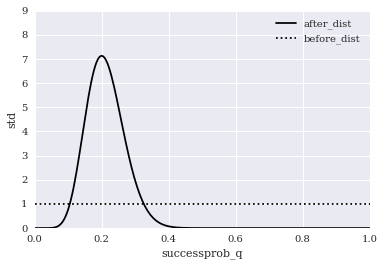

In [8]:
p = 0.25
n = 50
np.random.seed(1001)
data = st.bernoulli.rvs(p, size=n)
#ベルヌーイの設定
a0 = 1.0
b0 =1.0
prob = 0.95
results, a, b = bernoulli_stats(data, a0, b0, prob)
print(results.to_string(float_format='{:,.4f}'.format))
#パラメーター

fig1 = plt.figure(num=1, facecolor='w')
q = np.linspace(0,1,250)
plt.plot(q, st.beta.pdf(q, a, b), 'k-', label='after_dist')
plt.plot(q, st.beta.pdf(q, a0, b0), 'k:', label='before_dist')
plt.xlim(0,1)
plt.ylim(0,9)
plt.xlabel('successprob_q')
plt.ylabel('std')
plt.legend(loc='best', frameon = False)
plt.show()

In [5]:
[a,b]

[10.5, 40.5]

In [ ]:
#ポアソン分布
#λの事前分布をガンマ分布にする　αβ（１/θ）がパラメータ
p = 0.25
n = 50
np.random.seed(1001)
data = st.bernoulli.rvs(p, size=n)
#ベルヌーイの設定
a0 = 1.0
b0 =1.0
prob = 0.95
results, a, b = bernoulli_stats(data, a0, b0, prob)
print(results.to_string(float_format='{:,.4f}'.format))
#パラメーター

fig1 = plt.figure(num=1, facecolor='w')
q = np.linspace(0,1,250)
plt.plot(q, st.beta.pdf(q, a, b), 'k-', label='after_dist')
plt.plot(q, st.beta.pdf(q, a0, b0), 'k:', label='before_dist')
plt.xlim(0,1)
plt.ylim(0,9)
plt.xlabel('successprob_q')
plt.ylabel('std')
plt.legend(loc='best', frameon = False)
plt.show()


def bernoulli_stats(data, a0, b0, prob):
    n = data.size
    sum_data = data.sum()
    a = sum_data + a0
    b = n - sum_data + b0
    mean_pi = st.beta.mean(a, b)
    median_pi = st.beta.median(a, b)
    mode_pi = (a - 1.0) / (a + b - 2.0)
    sd_pi = st.beta.std(a,b)
    ci_pi = st.beta.interval(prob, a, b)
    hpdi_pi = beta_hpdi(ci_pi, a, b, prob)
    stats = np.hstack((mean_pi, median_pi, mode_pi, sd_pi, ci_pi, hpdi_pi))
    stats = stats.reshape((1,8))
    stats_string= ['mean','median','frequancy','std','trust.up','trust.down','HPD.up','HPD.up']
    param_string=['q']
    results = pd.DataFrame(stats, index=param_string, columns=stats_string)
    return results, a, b


def beta_hpdi(ci0, alpha, beta, prob):
    def hpdi_conditions(v, a, b, p):
        eq1 = st.beta.cdf(v[1], a, b) - st.beta.cdf(v[0], a ,b) -p
        eq2 = st.beta.pdf(v[1], a, b) - st.beta.pdf(v[0], a, b)
        return np.hstack((eq1, eq2))
    return opt.root(hpdi_conditions, ci0, args=(alpha,beta,prob)).x